In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Training set

In [2]:

X_train = np.array([[2104, 5, 1, 45], [1416, 3, 2, 40], [852, 2, 1, 35]])
y_train = np.array([460, 232, 178])

### Computing the model f_wb

In [3]:
# Multivariable linear regression
# w now is a vector: 1D array w = [w0,w1,w2..,wn] n is the number of features
# f_wb[0]= w0*x[0][0]+w1*x[0][1]+wnx[0][n]
# f_wb.shape == x.shape[0]
def compute_fwb(x,w,b):
    #w is vectors
    #x is a 2D array, I consider it as an array of vectors
    #x is a matrix
    m = x.shape[0]
    f_wb = np.zeros(m)
    #computing f_wb for every xi, where each one is a vector. if we have three parameters xi = {x1i,x2i,x3i}
    for i in range(m):
        f_wb[i] = np.dot(w,x[i])+b
    return f_wb


### Computing the cost function

In [4]:
def compute_cost(w, b, x, y):
    fwb = compute_fwb(x, w, b)
    m = x.shape[0]
    cost = 0.0
    for i in range(m):
        p = pow(fwb[i]-y[i],2)
        cost += 0.5/m*p
        
    return cost

### Computing the derivatives

In [5]:
#I am considering w as a vector here
#And we need to calculate the derivatives for each w[i]
def derivatives(w_i,b_i,x,y):
    #w is a vector
    w = w_i
    b = b_i
    m = x.shape[0]
    n = x.shape[1]
    
    #f_wb is a 1D array
    #the w gicen to compute_fwb() is a vector
    #x is an array of vetors
    f_wb = compute_fwb(x,w,b)
    #we need to calculate the dj_dw for every every w[i] in the vector
    
    dj_dw=np.zeros(n)
    dj_db=0.0
    for i in range(m):
        for j in range(n):
            #dj_dw is a vector of derivatives of dw1,dw2..,dwn
            dj_dw[j] +=  ((f_wb[i]-y[i])*x[i][j])/m
        dj_db +=  ((f_wb[i]-y[i]))/m
        
    
    return dj_dw,dj_db

### Computing gradient descent

In [6]:
def comp_gd(x,y,w_i,b_i,num_iter,alpha):
    w = w_i
    b = b_i
    J_history = []
    for i in range(num_iter):
        dj_dw,dj_db = derivatives(w,b,x,y)
        w = w - alpha*dj_dw
        b = b - alpha*dj_db
        J_history.append(compute_cost(w,b,x,y))
        if(i%100 == 0):
            print(f" {i} : w = {w}, b = {b:0.2f}")
    return w,b,J_history
    
    

### Gradient descent in action

In [7]:
n = X_train.shape[1]
w = np.zeros(n)
w_final,b_final,J_history = comp_gd(X_train,y_train,w,0.0,1000,5.0e-7)
print(f" w = {w_final}, b = {b_final:0.2f}")



 0 : w = [2.41334667e-01 5.58666667e-04 1.83666667e-04 6.03500000e-03], b = 0.00
 100 : w = [ 0.20235171  0.00079796 -0.00099658 -0.00219736], b = -0.00
 200 : w = [ 0.20253446  0.00112715 -0.00214349 -0.00940619], b = -0.00
 300 : w = [ 0.2027164   0.00145611 -0.00328876 -0.01658286], b = -0.00
 400 : w = [ 0.20289753  0.00178484 -0.00443238 -0.02372751], b = -0.00
 500 : w = [ 0.20307785  0.00211335 -0.00557437 -0.03084027], b = -0.00
 600 : w = [ 0.20325736  0.00244162 -0.00671473 -0.0379213 ], b = -0.00
 700 : w = [ 0.20343608  0.00276967 -0.00785347 -0.04497072], b = -0.00
 800 : w = [ 0.20361399  0.00309749 -0.00899059 -0.05198869], b = -0.00
 900 : w = [ 0.20379112  0.00342509 -0.01012611 -0.05897533], b = -0.00
 w = [ 0.20396569  0.00374919 -0.0112487  -0.0658614 ], b = -0.00


### Cost vs number of iterations

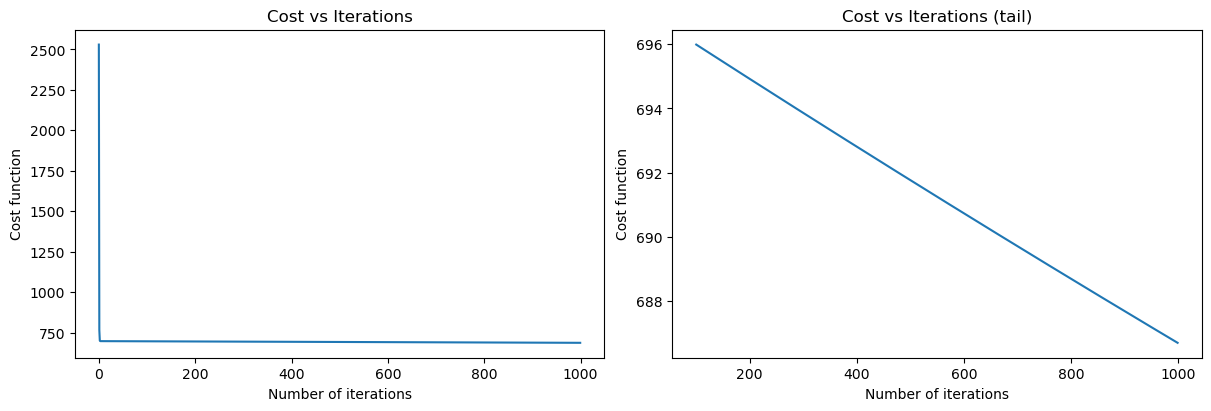

In [12]:
fig, (f1, f2) = plt.subplots(1,2, constrained_layout=True, figsize=(12,4))
f1.plot(J_history)
f1.set_xlabel('Number of iterations')
f1.set_ylabel('Cost function')
f1.set_title('Cost vs Iterations')
f2.plot(100+np.arange(len(J_history[100:])), J_history[100:])
f2.set_xlabel('Number of iterations')
f2.set_ylabel('Cost function')
f2.set_title('Cost vs Iterations (tail)')
plt.show()

In [10]:
pred = compute_fwb(X_train,w_final,b_final)
print(f"w: {w_final}, b: {b_final:0.2f}")
for i in range(X_train.shape[0]):
   print(f"Prediction : {pred[i]} , Target value : {y_train[i]}")

w: [ 0.20396569  0.00374919 -0.0112487  -0.0658614 ], b: -0.00
Prediction : 426.18530497189204 , Target value : 460
Prediction : 286.1674720078562 , Target value : 232
Prediction : 171.46763087132317 , Target value : 178
